In [2]:
import scanpy as sc
import anndata
import numpy as np
from scipy import sparse
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import sys
sys.path.append("./")
import scib_excerpts


In [28]:
savedir = "../result/8.27_qc/"
path_cells_removed_data = "../../unimportant_processed_data/8.25_integrateAll/8.25_cell_removed.h5ad"

In [4]:
adata = sc.read("../../unimportant_processed_data/8.25_integrateAll/8.26_merge.h5ad")

In [13]:
adata.raw.X[1:10,1:10].toarray()

array([[0., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 2., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [14]:
adata.X=adata.raw.X

In [15]:
adata.layers["counts"] = adata.X.copy()

In [16]:
adata

AnnData object with n_obs × n_vars = 781414 × 66515
    obs: 'Sample', 'Project', 'Core Dataset', 'Limb Atlas', 'Cranial Atlas', 'Organ', 'Tissue', 'Tissue(Specific)', 'Stage', 'Gene type', 'Treatment', 'Age', 'Age(In Detail)', 'Machine', 'Species', 'Isolation approach', 'Digestion', 'Enzymes', 'Cre', 'Bone Forming Methods', 'Data Source', 'Related Assay', 'Cell Count After QC', 'Origin', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'nCount_originalexp', 'nFeature_originalexp'
    var: 'features'
    layers: 'counts'

In [17]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [18]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [23]:
adata.write_h5ad("../../unimportant_processed_data/8.25_integrateAll/8.26_merge.h5ad")

In [22]:
adata.__dict__['_raw'].__dict__['_var'] = adata.__dict__['_raw'].__dict__['_var'].rename(columns={'_index': 'features'})

In [21]:
 adata.__dict__['_raw'].__dict__['_var'].rename(columns={'_index': 'features'})


,features
0,00R-AC107638.2
1,0610005C13Rik
2,0610005C13rik
3,0610006L08Rik
4,0610007N19Rik
...,...
66510,Gm20424
66511,Hammerhead-HH9
66512,RP23-282G22.2
66513,RP24-282D16.2


In [24]:
sc.pp.calculate_qc_metrics(adata, inplace=True, layer="counts")

In [25]:
adata.obs["Project"].unique()

['Suture2021_Farmer', 'CranioSoxc_Angelozzi', 'CalvariaP4_Ayturk', 'Mandible2020_Chai', 'Frontal_Holmes', ..., 'Periosteal2018_Shawon', 'RibRegeneraton_Serowoky', 'SkeletalMuscle_Julien', 'Sp7Cre2019_Bohm', 'SSC2021_Ambrosi']
Length: 66
Categories (66, object): ['Ablation_Matsushita', 'Articular_Arce', 'Articular_Sebastian', 'BMSC-Specification_Kishor', ..., 'Suture2021_Farmer', 'coronal_Holmes', 'lambdoid_Holmes', 'sagittal_Holmes']

In [26]:
adata.obs

,Sample,Project,Core Dataset,Limb Atlas,Cranial Atlas,Organ,Tissue,Tissue(Specific),Stage,Gene type,...,nFeature_originalexp,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0_1_1,Suture2021_Farmer_E17,Suture2021_Farmer,TRUE,FALSE,TRUE,Head,Suture mesenchyme,Coronal suture,Development,WT,...,3222,3222,3222,8.078068,11668.0,9.364691,27.511142,41.052451,52.331162,66.241001
Suture2021_Farmer_E17_AAACCTGGTGCGGTAA-1_1-0_1_1,Suture2021_Farmer_E17,Suture2021_Farmer,TRUE,FALSE,TRUE,Head,Suture mesenchyme,Coronal suture,Development,WT,...,3910,3910,3910,8.271548,14744.0,9.598659,21.791915,34.122355,45.889853,61.123169
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0_1_1,Suture2021_Farmer_E17,Suture2021_Farmer,TRUE,FALSE,TRUE,Head,Suture mesenchyme,Coronal suture,Development,WT,...,3533,3533,3533,8.170186,14962.0,9.613336,26.313327,39.279508,51.430290,66.602059
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0_1_1,Suture2021_Farmer_E17,Suture2021_Farmer,TRUE,FALSE,TRUE,Head,Suture mesenchyme,Coronal suture,Development,WT,...,3565,3565,3565,8.179200,14473.0,9.580109,28.452981,39.197126,50.922407,66.054032
Suture2021_Farmer_E17_AAACCTGTCGTTACGA-1_1-0_1_1,Suture2021_Farmer_E17,Suture2021_Farmer,TRUE,FALSE,TRUE,Head,Suture mesenchyme,Coronal suture,Development,WT,...,3968,3968,3968,8.286269,14249.0,9.564512,20.990947,31.223244,43.385501,59.379606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGAGGTGATAT-1_8,LimbG610C_Gorrell_calvariaWT4,LimbG610C_Gorrell,FALSE,NA,FALSE,Head,Calvarial bone,Parietal bone,Development,WT,...,0,4289,4289,8.364042,14886.0,9.608244,22.853688,32.023378,42.953110,57.423082
TTTGTTGAGTCTTCCC-1_8,LimbG610C_Gorrell_calvariaWT4,LimbG610C_Gorrell,FALSE,NA,FALSE,Head,Calvarial bone,Parietal bone,Development,WT,...,0,1562,1562,7.354362,3307.0,8.104099,31.902026,39.189598,49.107953,67.886302
TTTGTTGGTCCACACG-1_8,LimbG610C_Gorrell_calvariaWT4,LimbG610C_Gorrell,FALSE,NA,FALSE,Head,Calvarial bone,Parietal bone,Development,WT,...,0,4406,4406,8.390949,19306.0,9.868223,29.912980,40.598778,51.377810,64.451466
TTTGTTGTCACTACGA-1_8,LimbG610C_Gorrell_calvariaWT4,LimbG610C_Gorrell,FALSE,NA,FALSE,Head,Calvarial bone,Parietal bone,Development,WT,...,0,1427,1427,7.264030,2971.0,7.996990,28.811848,41.568495,52.541232,68.798384


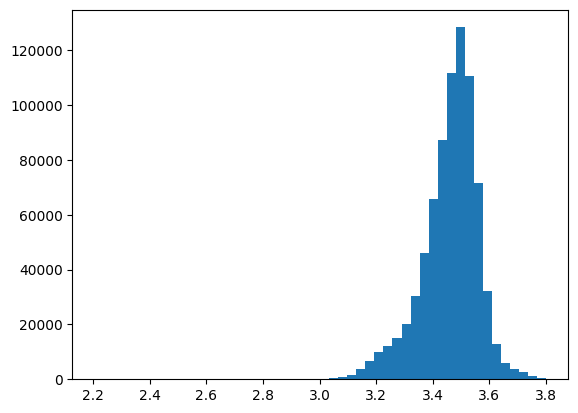

In [29]:
new_totals = np.array(np.sum(adata.X, axis=1))
plt.hist(np.log10(new_totals), bins=50)
plt.savefig(f"{savedir}/qc_count_barplot")
plt.show()

In [31]:
gb_values = sns.color_palette("Set2", 15)
color_labels = adata.obs["Project"].unique()
color_map = dict(zip(color_labels, gb_values))

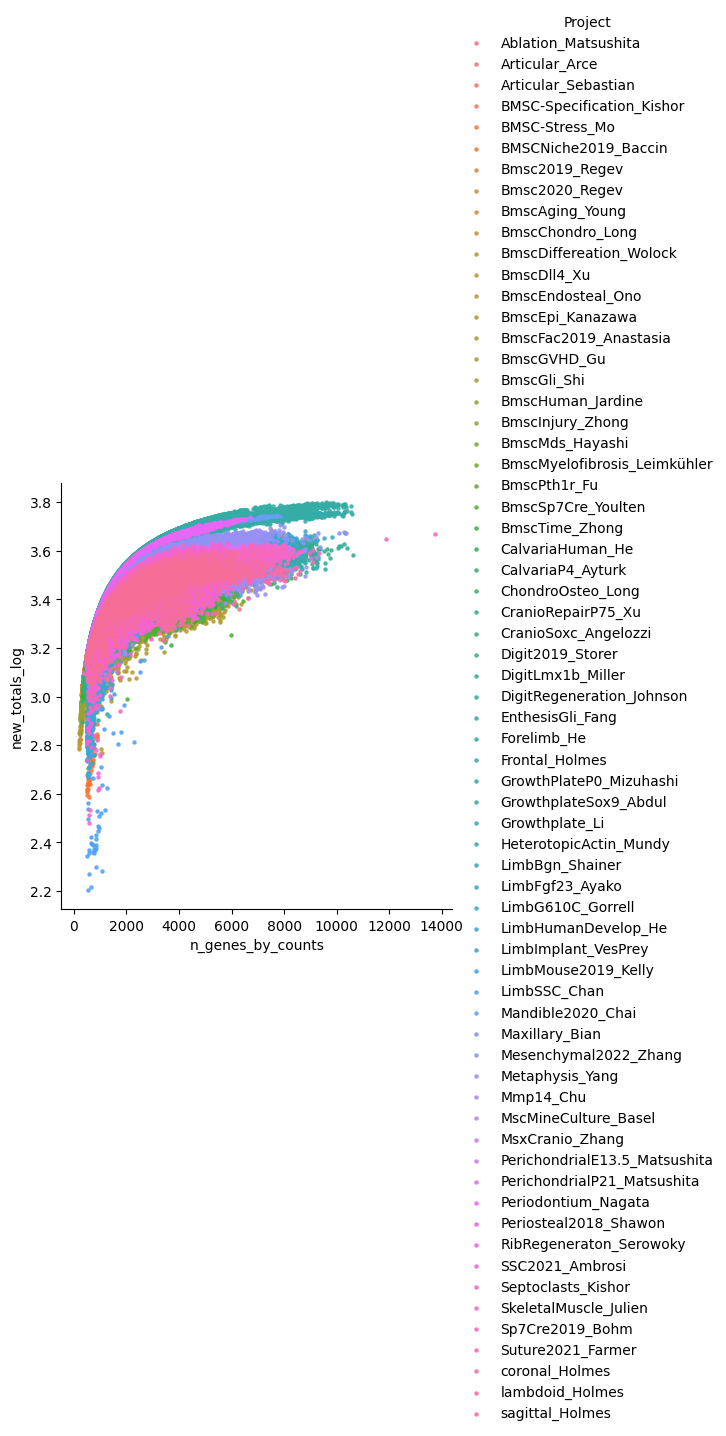

In [33]:
plotdf = adata.obs
plotdf["new_totals_log"] = np.log10(new_totals)
sns.lmplot(
    x="n_genes_by_counts",
    y="new_totals_log",
    data=plotdf,
    hue="Project",
    fit_reg=False,
    scatter_kws={"s": 5},
)
plt.savefig(f"{savedir}/qc_count_genedetect.pdf")
plt.show()

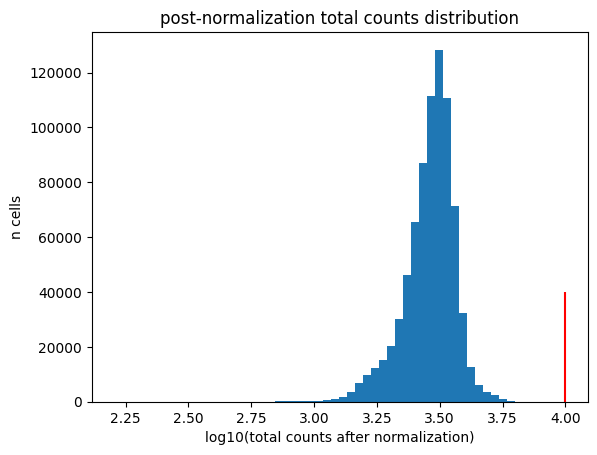

In [35]:
plt.hist(np.log10(new_totals), bins=50)
plt.xlabel("log10(total counts after normalization)")
plt.ylabel("n cells")
plt.vlines(x=4.0, ymin=0, ymax=40000, color="red")
plt.title("post-normalization total counts distribution")
plt.show()

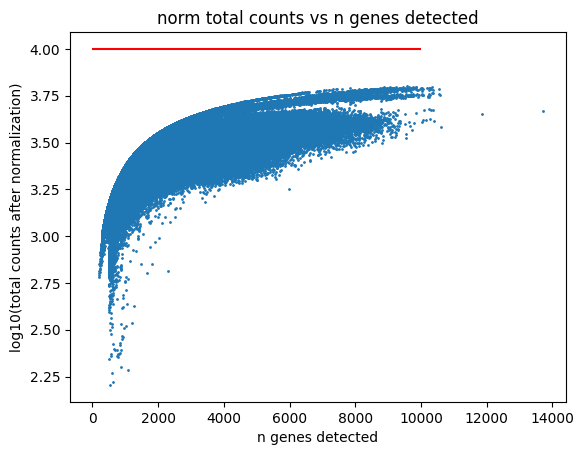

In [37]:
plt.scatter(
    adata.obs.n_genes_by_counts.values,
    np.log10(new_totals),
    s=1,
)
plt.hlines(y=4.0,xmin=0, xmax=10000, color="red")
plt.xlabel("n genes detected")
plt.ylabel("log10(total counts after normalization)")
plt.title("norm total counts vs n genes detected")
plt.show()

In [38]:
plt.hist(np.log10(adata.obs.size_factors), bins=50)
plt.xlabel("log10(1/size_factor)")
plt.ylabel("ncells")
plt.vlines(x=np.log10(0.01), ymin=0, ymax=30000, color="red")
plt.title("SCRAN size factor distribution")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'size_factors'

In [39]:
# function to calculate variances on *sparse* matrix
def vars(a, axis=None):
    """ Variance of sparse matrix a
    var = mean(a**2) - mean(a)**2
    """
    a_squared = a.copy()
    a_squared.data **= 2
    return a_squared.mean(axis) - np.square(a.mean(axis))

In [40]:
means = np.mean(adata.X, axis=0)
variances = vars(adata.X, axis=0)
dispersions = variances / means

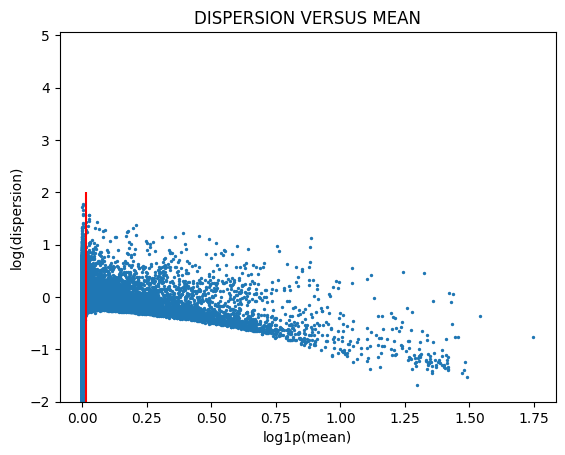

In [46]:
min_mean = 0.015
# plot mean versus dispersion plot:
# now plot
plt.scatter(
    np.log1p(means).tolist()[0], np.log(dispersions).tolist()[0], s=2
)
plt.vlines(x=np.log1p(min_mean),ymin=-3,ymax=2,color='red')
plt.xlabel("log1p(mean)")
plt.ylabel("log(dispersion)")
plt.title("DISPERSION VERSUS MEAN")
plt.ylim(ymin=-2)
plt.show()

In [48]:
sc.pp.highly_variable_genes(adata, batch_key="Project",min_mean=min_mean, flavor="cell_ranger",n_top_genes=2000)

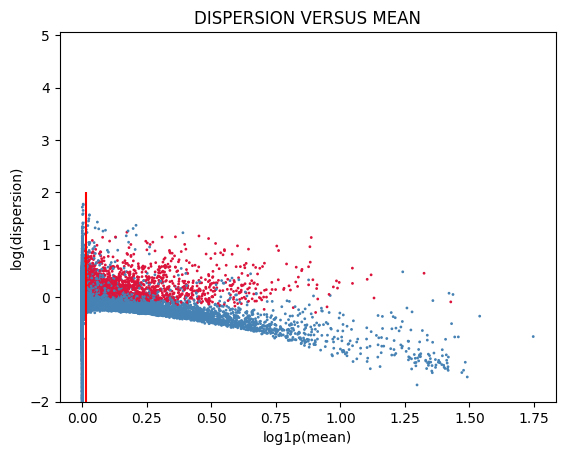

In [50]:
boolean_to_color = {
    True: "crimson",
    False: "steelblue",
}  # make a dictionary that translates the boolean to colors
hvg_colors = adata.var.highly_variable.map(boolean_to_color)  # 'convert' the boolean
# now plot
plt.scatter(
    np.log1p(means).tolist()[0], np.log(dispersions).tolist()[0], s=1, c=hvg_colors
)
plt.vlines(x=np.log1p(min_mean),ymin=-3,ymax=2,color='red')
plt.xlabel("log1p(mean)")
plt.ylabel("log(dispersion)")
plt.title("DISPERSION VERSUS MEAN")
plt.ylim(ymin=-2)
plt.savefig(f"{savedir}/hvg.pdf")
plt.show()

In [51]:
adata.write(
    "../../important_processed_data/8.27_mergeall_log1p_gene_filtered.h5ad"
)